In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import surprise as sp 
import tensorflow as tf

from tensorflow import keras
from collections import deque
from surprise.model_selection import cross_validate
from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model
from sklearn.metrics import mean_squared_error

In [262]:
rating = pd.read_csv('Dataset - Rating.csv')
place = pd.read_csv('Dataset - tourismBali.csv')
user = pd.read_csv('user.csv')

In [263]:
# place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
# place

In [264]:
place = place[place['City']=='Gianyar']
# place = place.drop('Time_Minutes', axis=1)
place

,Place_Id,Place_Name,Description,Weekend Holiday Price,Weekday Price,Category,City,Rating,Alamat,Coordinate,Lat,Long,Gambar,Unnamed: 13
0,1,Agrowisata Satria,Agrowisata Satria menawarkan 'rasa' Bali pada ...,50000.0,50000.0,Wisata Alam,Gianyar,3.0,"Manukaya, Kec. Tampaksiring, Kabupaten Gianya...","-8.402228546131536, 115.32296693687739",-8.402229,115.322967,V,V
4,5,Air Terjun Tegenungan,Bosan dengan wisata alam pantai dan ingin meni...,20000.0,20000.0,Wisata Alam,Gianyar,4.0,"Jl. Ir. Sutami, Kemenuh, Kec. Sukawati, Kabupa...","-8.575191460385602, 115.28870189592831",-8.575191,115.288702,V,NaN
6,7,Aloha Ubud Swing,Ajaklah orang-orang tercinta untuk mencoba ayu...,300000.0,300000.0,NaN,Gianyar,5.0,"Jl. Raya Tegallalang, Tegallalang, Kec. Tegall...","-8.46373820219863, 115.27644702698535",-8.463738,115.276447,V,NaN
7,8,Bali Bird Park,atraksi wisata sekaligus tempat penangkaran be...,110000.0,95000.0,NaN,Gianyar,4.5,"Jl. Serma Cok Ngurah Gambir Singapadu, Batubul...","-8.599725396796988, 115.25188218428634",-8.599725,115.251882,V,NaN
10,11,Batik Koleksi Sari Amerta,Merupakan toko batik yang berlokasi di Kabupat...,0.0,0.0,NaN,Gianyar,3.5,"Jl. Raya Batubulan No.9, Batubulan, Kec. Sukaw...","-8.628437289519926, 115.2590844527602",-8.628437,115.259085,V,NaN
18,19,Desa Celuk,Celuk adalah sebuah desa dengan hasil produksi...,0.0,0.0,NaN,Gianyar,3.5,"Jalan Raya Celuk, Sukawati 80582 Indonesia","-8.600115880670678, 115.27177008428649",-8.600116,115.271770,V,NaN
20,21,Galeri Seni Semar Kuning,Semar Kuning Artist Cooperative merupakan sebu...,0.0,0.0,NaN,Gianyar,4.5,"Jl. A.A. Gede Rai No.8, Lodtunduh, Kecamatan U...","-8.543034856755826, 115.26184812476401",-8.543035,115.261848,V,NaN
22,23,Goa Gajah,"Objek wisata Goa Gajah, sejatinya adalah penin...",30000.0,30000.0,NaN,Gianyar,3.5,"Jalan Raya Goa Gajah No.99 Kemenuh Sukawati, P...","-8.522487004698739, 115.28773388639792",-8.522487,115.287734,V,NaN
26,27,Puri Ubud,Puri Ubud atau biasa disebut Puri Saren Agung ...,0.0,0.0,NaN,Gianyar,3.5,"Jl. Raya Ubud No.8, Ubud, Kecamatan Ubud, Kabu...","-8.506421904753028, 115.2627262641622",-8.506422,115.262726,V,NaN
32,33,Sacred Monkey Forest Sanctuary,Mandala Suci Wenara Wana atau disebut juga Mon...,60000.0,60000.0,NaN,Gianyar,4.0,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...","-8.519001327873266, 115.26062989756416",-8.519001,115.260630,V,NaN


In [265]:
rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating

,User_Id,Place_Id,Nama Tempat,Place_Rating
0,3,1,Satria Agrowisata,4
1,4,1,Satria Agrowisata,4
2,5,1,Satria Agrowisata,1
3,6,1,Satria Agrowisata,4
4,9,1,Satria Agrowisata,4
...,...,...,...,...
801,90,75,Wisata Agro Teba Sari Bali,4
802,91,75,Wisata Agro Teba Sari Bali,3
803,93,75,Wisata Agro Teba Sari Bali,3
804,96,75,Wisata Agro Teba Sari Bali,2


In [266]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Bandung
user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
87,1,Gianyar,20
46,2,Badung,21
0,3,Bangli,23
1,4,Buleleng,21
2,5,Gianyar,20


In [267]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


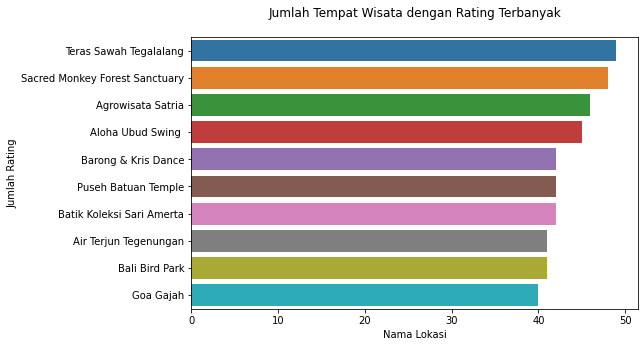

In [268]:
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

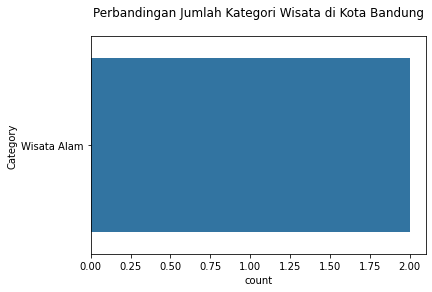

In [269]:
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


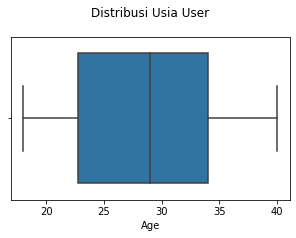

In [270]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

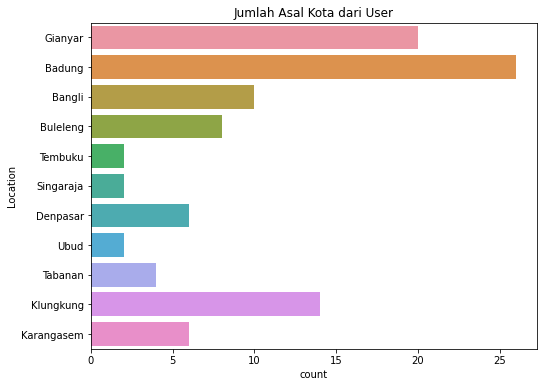

In [271]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

In [305]:
min_place_rating = 10
filter_place = (rating["Place_Id"].value_counts()>min_place_rating)
filter_place = filter_place[filter_place].index.tolist()

min_user_rating = 10
filter_user = (rating["User_Id"].value_counts()>min_user_rating)
filter_user = filter_user[filter_user].index.tolist()

data_filtered = rating[(rating["Place_Id"].isin(filter_place)) & 
                       (rating["User_Id"].isin(filter_place))]
del filter_place,filter_user,min_place_rating,min_user_rating
print('Shape User-Ratings unfiltered:\t{}'.format(rating.shape))
print('Shape User-Ratings filtered:\t{}'.format(data_filtered.shape))

Shape User-Ratings unfiltered:	(806, 4)
Shape User-Ratings filtered:	(162, 4)


In [321]:
data_filtered

,User_Id,Place_Id,Nama Tempat,Place_Rating
0,7,19,Desa Celuk,5
1,71,58,Gunung Kawi Sebatu Temple,4
2,58,1,Satria Agrowisata,4
3,21,8,Bali Bird Park,5
4,56,21,Galeri Seni Semar Kuning,5
...,...,...,...,...
157,74,74,Alas Harum Agro Tourism,4
158,5,5,Air Terjun Tegenungan,4
159,27,5,Air Terjun Tegenungan,4
160,33,65,Pura Tirta Empul,5


In [322]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data_filtered, test_size=0.8, random_state=25)

In [327]:
# Create user- & place-id mapping
user_id_mapping = {id:i for i, id in enumerate(data_filtered['User_Id'].unique())}
place_id_mapping = {id:i for i, id in enumerate(data_filtered['Place_Id'].unique())}


# Create correctly mapped train- & testset
train_user_data = df_train['User_Id'].map(user_id_mapping)
train_place_data = df_train['Place_Id'].map(place_id_mapping)

test_user_data = df_test['User_Id'].map(user_id_mapping)
test_place_data = df_test['Place_Id'].map(place_id_mapping)


# Get input variable-sizes
users = len(user_id_mapping)
places = len(place_id_mapping)
embedding_size = 5

# Setup variables
user_embedding_size = 10
place_embedding_size = 5


##### Create model
# Set input layers
user_id_input = Input(shape=[1], name='user')
place_id_input = Input(shape=[1], name='place')

# Create embedding layers for users and places
user_embedding = Embedding(output_dim=user_embedding_size, 
                           input_dim=users,
                           input_length=1, 
                           name='user_embedding')(user_id_input)
place_embedding = Embedding(output_dim=place_embedding_size, 
                            input_dim=places,
                            input_length=1, 
                            name='item_embedding')(place_id_input)

# Reshape the embedding layers
user_vector = Reshape([user_embedding_size])(user_embedding)
place_vector = Reshape([place_embedding_size])(place_embedding)

# Concatenate the reshaped embedding layers
concat = Concatenate()([user_vector, place_vector])

# Combine with dense layers
dense = Dense(256)(concat)
y = Dense(1)(dense)

# Setup model
model = Model(inputs=[user_id_input, place_id_input], outputs=y)
model.compile(
    loss = "mse",optimizer = keras.optimizers.Adam(learning_rate=0.05)
)



# Fit model
history = model.fit([train_user_data, train_place_data],
          df_train['Place_Rating'],
          batch_size=256, 
          epochs=100,
          validation_split=0.1,
          shuffle=True)

# Test model
y_pred = model.predict([test_user_data, test_place_data])
#y_pred = model.predict([user_place_array])

y_true = df_test['Place_Rating'].values

#  Compute RMSE
rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result With Keras Deep Learning: {:.4f} RMSE'.format(rmse))

Epoch 1/100
1/1 [==============================] - 1s 658ms/step - loss: 15.2416 - val_loss: 11.5722
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 8.5656 - val_loss: 0.9599
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 2.5366 - val_loss: 1.1454
Epoch 4/100
1/1 [==============================] - 0s 53ms/step - loss: 4.3239 - val_loss: 0.8346
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 1.1213 - val_loss: 3.4754
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 1.9802 - val_loss: 4.2116
Epoch 7/100
1/1 [==============================] - 0s 124ms/step - loss: 2.4162 - val_loss: 2.2098
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 1.0962 - val_loss: 0.4394
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 0.6485 - val_loss: 0.7485
Epoch 10/100
1/1 [==============================] - 0s 41ms/step - loss: 1.8697 - val_loss: 0.2947
Epoch 11/100
1/

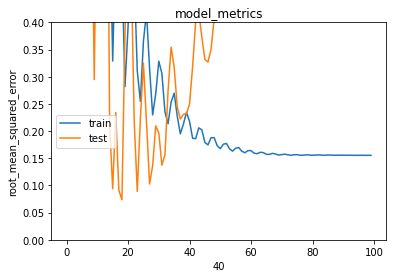

In [330]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [ ]:
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [ ]:
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Rating',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,7)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

1/1 [==============================] - 0s 42ms/step
Daftar rekomendasi untuk: User 29

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Aloha Ubud Swing  : nan
Galeri Seni Semar Kuning : nan
Ubud Traditional Art Market : nan
Gunung Kawi Sebatu Temple  : nan
Pura Tirta Empul : nan

------------------------------------------------------------
Top 7 place recommendation
------------------------------------------------------------
1 . Bali Bird Park 
     nan , Harga Tiket Masuk  Rating Wisata  4.5 

2 . Batik Koleksi Sari Amerta 
     nan , Harga Tiket Masuk  Rating Wisata  3.5 

3 . Desa Celuk 
     nan , Harga Tiket Masuk  Rating Wisata  3.5 

4 . Puri Ubud 
     nan , Harga Tiket Masuk  Rating Wisata  3.5 

5 . Puseh Batuan Temple 
     nan , Harga Tiket Masuk  Rating Wisata  4.0 

6 . Pura Saraswati 
     nan , Harga Tiket Masuk  Rating Wisata  4.0 



Rekomendasi Menggunakan Arpiori

In [ ]:
df = pd.read_csv("Randomized_Dummy_package_tourism.csv")
df = df.drop(['Package','City'],axis=1)

In [ ]:
null_cols = df.columns[df.isnull().any()]
pd.DataFrame({'Columns':null_cols,
              'MissingData (Total)':df[null_cols].isnull().sum().values,
              'MissingData (Percentage)':(df[null_cols].isnull().sum()*100/len(df)).values}).set_index('Columns')

,MissingData (Total),MissingData (Percentage)
Columns,,
Place Tourism2,23,0.23
Place Tourism3,47,0.47
Place Tourism4,1973,19.73
Place Tourism5,5911,59.11
Place Tourism6,2038,20.38
Place Tourism7,5941,59.41
Place Tourism8,5941,59.41


In [ ]:
print('Jumlah data duplikat:', df.duplicated().sum())
df = df.replace(to_replace ='/', value = ' ', regex = True)
df.tail(3)

Jumlah data duplikat: 27


,Place Tourism1,Place Tourism2,Place Tourism3,Place Tourism4,Place Tourism5,Place Tourism6,Place Tourism7,Place Tourism8
9997,Kampung Tematik Jawi,Waduk Jatibarang,Candi Gedong Songo,NaN,NaN,NaN,NaN,NaN
9998,Museum Nike Ardilla,Chingu Cafe Little Seoul,Gua Pawon,Caringin Tilu,Kampung Korea Bandung,Caringin Tilu,Kampung Korea Bandung,Kampung Korea Bandung
9999,Pantai Kukup,Hutan Mangrove Kulon Progo,Taman Situ Lembang,NaN,NaN,NaN,NaN,NaN


In [ ]:
threshold = 10 # minimum occurences to be frequent

from collections import defaultdict
item_counts = defaultdict(int) # per item occurences

for x in range(len(df)):
    cart = df.iloc[x].dropna().to_list() #makes item lists
    for items in cart:
        for item in items.split(", "):
            item_counts[item] += 1
    frequent_items = set() # items above minimum threshold
    for item in item_counts:
        if item_counts[item] > threshold:
            frequent_items.add(item)

In [ ]:
item_counts

defaultdict(int,
            {'Tugu Muda Semarang': 268,
             'Pura Giri Natha': 280,
             'Wisata Alam Wana Wisata Penggaron': 371,
             'Taman Pandanaran': 285,
             'Lava Bantal': 127,
             'Pantai Ria Kenjeran': 234,
             'House of Sampoerna': 217,
             'Jembatan Merah': 232,
             'Monumen Bambu Runcing Surabaya': 238,
             'Sindu Kusuma Edupark (SKE)': 115,
             'Tebing Breksi': 117,
             'Hutan Mangrove Kulon Progo': 110,
             'Pantai Drini': 101,
             'Pantai Sundak': 108,
             'Bukit Lintang Sewu': 84,
             'Hutan Pinus Asri': 95,
             'Mall Thamrin City': 187,
             'Museum Tekstil': 169,
             'Wisata Agro Edukatif Istana Susu Cibugary': 177,
             'Pasar Tanah Abang': 211,
             'Flower Farm Setiya Aji': 280,
             'Kampung Tematik Jawi': 306,
             'Museum Kereta Ambarawa': 298,
             'Desa Wisata Le

In [ ]:
fic = pd.DataFrame.from_dict(item_counts, orient='index', columns=["occurences"]).reset_index()
fic = fic.rename(columns={"index":"items"}).sort_values("occurences", ascending=False)
fic = fic[fic["occurences"]>threshold]
fic["relative_occ"] = fic["occurences"] / fic["occurences"].sum()
print("relative occurences = support")
fic.head(10)

relative occurences = support


,items,occurences,relative_occ
2,Wisata Alam Wana Wisata Penggaron,371,0.006383
171,Semarang Chinatown,336,0.005781
156,Watu Gunung Ungaran,333,0.005729
72,Indonesia Kaya Park,331,0.005695
36,Kampoeng Djadhoel Semarang,324,0.005574
69,Water Blaster Bukit Candi Golf,324,0.005574
21,Kampung Tematik Jawi,306,0.005264
140,Durian Gardens and Tourism Education Watu Simbar,304,0.005230
106,Jembatan Biru Ambarawa,304,0.005230
88,Waduk Jatibarang,302,0.005196


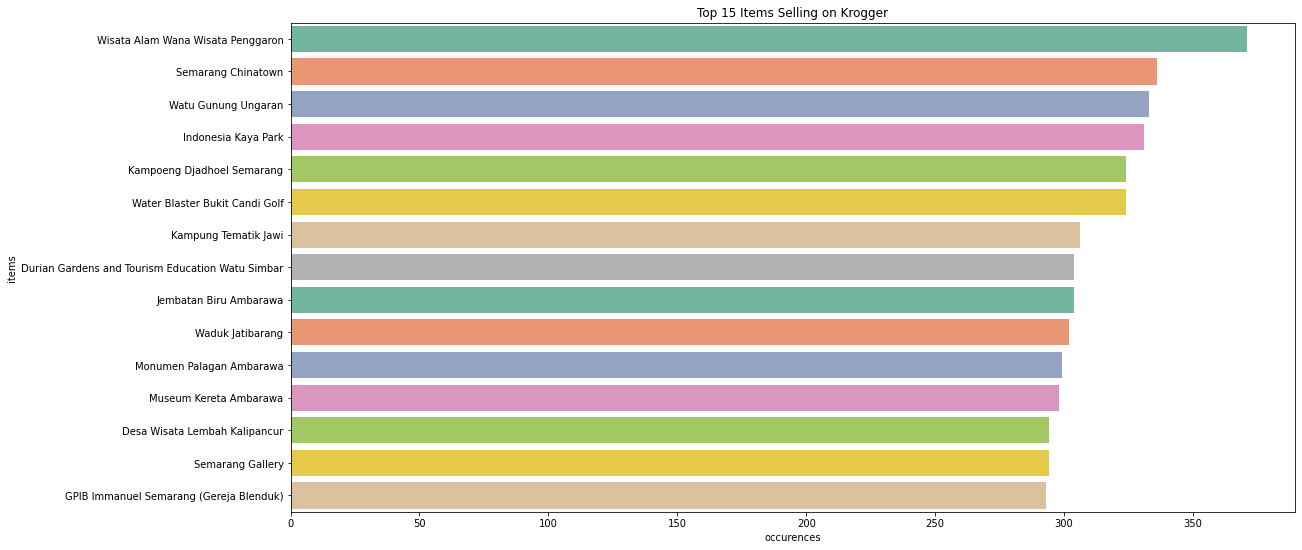

In [ ]:
plt.figure(figsize=(18,9))
plt.title('Top 15 Items Selling on Krogger')
fi = fic.head(15)
sns.barplot(x=fi["occurences"], y=fi["items"], palette = 'Set2')

plt.show()

In [ ]:
def sort(*args):# so that [a,b] and [b,a] count the same
    return str(sorted(args))

pair_counts = defaultdict(int) # pair occurences

for x in range(len(df)):
    cart = df.iloc[x].dropna().to_list()
    for p1 in range(len(cart)-1): # pointer 1 [(a), b, c, d]
        if cart[p1] not in frequent_items: #candidate item check
            continue
        for p2 in range(p1+1, len(cart)): # pointer 2 [a, (b), c, d]
            if cart[p2] not in frequent_items:
                continue
            # we do not want to put a third pointer here*
            pair = sort(cart[p1], cart[p2])
            pair_counts[pair] += 1
                
frequent_pairs = set()
for pair in pair_counts:
    if pair_counts[pair] > threshold:
        frequent_pairs.add(pair)

In [ ]:
pair_counts

defaultdict(int,
            {"['Pura Giri Natha', 'Tugu Muda Semarang']": 26,
             "['Tugu Muda Semarang', 'Wisata Alam Wana Wisata Penggaron']": 34,
             "['Tugu Muda Semarang', 'Tugu Muda Semarang']": 131,
             "['Taman Pandanaran', 'Tugu Muda Semarang']": 45,
             "['Lava Bantal', 'Tugu Muda Semarang']": 2,
             "['Pura Giri Natha', 'Wisata Alam Wana Wisata Penggaron']": 31,
             "['Pura Giri Natha', 'Taman Pandanaran']": 33,
             "['Lava Bantal', 'Pura Giri Natha']": 1,
             "['Taman Pandanaran', 'Wisata Alam Wana Wisata Penggaron']": 43,
             "['Lava Bantal', 'Wisata Alam Wana Wisata Penggaron']": 1,
             "['Lava Bantal', 'Taman Pandanaran']": 3,
             "['Taman Pandanaran', 'Taman Pandanaran']": 164,
             "['House of Sampoerna', 'Pantai Ria Kenjeran']": 27,
             "['Jembatan Merah', 'Pantai Ria Kenjeran']": 26,
             "['Monumen Bambu Runcing Surabaya', 'Pantai Ria Kenjeran

In [ ]:
import re
def splitre(pairs, l): # confidence denominator
  pairz = []
  idx1 = []
  idx2 = []
  idx3 = []
  for pairss in pairs:
    pairz.append(pairss)
  if l == 2:
    for x in range(len(pairz)):
      pair = re.sub("[^\w]", " ", pairz[x]).strip().replace("    ", ", ")
      idx1.append(pair.split(", ")[0])
      idx2.append(pair.split(", ")[1])
  elif l ==3:
    for x in range(len(pairz)):
      pair = re.sub("[^\w]", " ", pairz[x]).strip().replace("    ", ", ")
      idx1.append(pair.split(", ")[0])
      idx2.append(pair.split(", ")[1])
      idx3.append(pair.split(", ")[2])

  if l == 3:
    return idx1, idx2, idx3
  return idx1, idx2

In [ ]:
def confidence(product):
  out = []
  for x in range(len(product)):
    for y in range(len(fic)):
      if product.iloc[x] == fic["items"].iloc[y]:
        out.append(fpc["occurences"].iloc[x] /fic["occurences"].iloc[y])
  return out

In [ ]:
def lift2(n):
  out = []
  ld1 = []
  ld2 = []
  for x in range(len(n)):
    for y in range(len(fic)):
      if fpc["pair1"].iloc[x] == fic["items"].iloc[y]:
        ld1.append(fic["relative_occ"].iloc[y])
      elif fpc["pair2"].iloc[x] == fic["items"].iloc[y]:
        ld2.append( fic["relative_occ"].iloc[y])
  for x in range(len(ld1)):
    out.append(fpc["relative_occ"].iloc[x] /(ld1[x]*ld2[x]))
  return out

In [ ]:
# frequent pair counts
fpc = pd.DataFrame.from_dict(pair_counts, orient='index', columns=["occurence"]).reset_index()
fpc = fpc.rename(columns={"index":"pairs"}).sort_values("occurence", ascending=False)
fpc = fpc[fpc["occurence"]>threshold]
pair1, pair2 = splitre(fpc["pairs"], 2)
fpc["pair1"] = pair1
fpc["pair2"] = pair2
fpc["occurences"] = fpc["occurence"]
fpc = fpc.drop(columns=(fpc.columns[:2]))
fpc["relative_occ"] = fpc["occurences"] / fpc["occurences"].sum()
# fpc["confidence"] = confidence(fpc["pair1"])
# fpc["lift"] = lift2(fpc["occurences"])
fpc.head(10)
fpc

,pair1,pair2,occurences,relative_occ
617,Semarang Chinatown,Semarang Chinatown,214,0.001539
548,Wisata Alam Wana Wisata Penggaron,Wisata Alam Wana Wisata Penggaron,207,0.001489
528,Watu Gunung Ungaran,Watu Gunung Ungaran,193,0.001388
209,Waduk Jatibarang,Waduk Jatibarang,173,0.001244
155,Kampung Tematik Jawi,Kampung Tematik Jawi,173,0.001244
...,...,...,...,...
7859,Masjid Al Imtizaj,Taman Sejarah Bandung,11,0.000079
738,Museum Geologi Bandung,Taman Budaya Jawa Barat,11,0.000079
2402,Air Mancur Menari,Food Junction Grand Pakuwon,11,0.000079
3952,Jembatan Merah,Kebun Bibit Wonorejo,11,0.000079


In [ ]:
def generate_pairs(*args):
    pairs = []
    for p1 in range(len(args)-1):
        for p2 in range(p1+1, len(args)):
            pairs.append(sort(args[p1], args[p2]))
    return pairs

triple_counts = defaultdict(int)

for x in range(len(df)):
    cart = df.iloc[x].dropna().to_list()
    for p1 in range(len(cart)-2):
        if cart[p1] not in frequent_items:
            continue
        for p2 in range(p1+1, len(cart)-1):
            if cart[p2] not in frequent_items:
                continue
            first_pair = sort(cart[p1], cart[p2])
            if first_pair not in frequent_pairs: # checks candidate pair
                continue
            for p3 in range(p2+1, len(cart)):
                if cart[p3] not in frequent_items:
                    continue
                pairs = generate_pairs(cart[p1], cart[p2], cart[p3])
                if any(pair not in frequent_pairs for pair in pairs): #checks if candidate pairs
                    continue
                triple = sort(cart[p1], cart[p2], cart[p3])
                triple_counts[triple] += 1
frequent_triples = set()
for triple in triple_counts:
    if triple_counts[triple] > threshold:
        frequent_triples.add(triple)

In [ ]:
triple_counts

defaultdict(int,
            {"['Pura Giri Natha', 'Tugu Muda Semarang', 'Wisata Alam Wana Wisata Penggaron']": 3,
             "['Pura Giri Natha', 'Tugu Muda Semarang', 'Tugu Muda Semarang']": 7,
             "['Pura Giri Natha', 'Taman Pandanaran', 'Tugu Muda Semarang']": 6,
             "['Tugu Muda Semarang', 'Tugu Muda Semarang', 'Wisata Alam Wana Wisata Penggaron']": 13,
             "['Taman Pandanaran', 'Tugu Muda Semarang', 'Wisata Alam Wana Wisata Penggaron']": 6,
             "['Taman Pandanaran', 'Tugu Muda Semarang', 'Tugu Muda Semarang']": 15,
             "['Taman Pandanaran', 'Taman Pandanaran', 'Tugu Muda Semarang']": 29,
             "['Pura Giri Natha', 'Taman Pandanaran', 'Wisata Alam Wana Wisata Penggaron']": 3,
             "['Pura Giri Natha', 'Taman Pandanaran', 'Taman Pandanaran']": 16,
             "['Taman Pandanaran', 'Taman Pandanaran', 'Wisata Alam Wana Wisata Penggaron']": 28,
             "['Taman Pandanaran', 'Taman Pandanaran', 'Taman Pandanaran']": 5

In [ ]:
def confidence2(item1, item2):
  out = []
  for x in range(len(item1)):
    for y in range(len(fic)):
      if item1.iloc[x] == fpc["pair1"].iloc[y] and item2.iloc[x] == fpc["pair2"].iloc[y]:
        out.append(ftc["occurences"].iloc[x] /fpc["occurences"].iloc[y])
  return out

In [ ]:
def lift3(n):
  out = []
  ld1 = []
  ld2 = []
  ld3 = []
  for x in range(len(n)):
    for y in range(len(fic)):
      if ftc["item1"].iloc[x] == fic["items"].iloc[y]:
        ld1.append(fic["relative_occ"].iloc[y])
      elif ftc["item2"].iloc[x] == fic["items"].iloc[y]:
        ld2.append( fic["relative_occ"].iloc[y])
      elif ftc["item3"].iloc[x] == fic["items"].iloc[y]:
        ld3.append( fic["relative_occ"].iloc[y])
  for x in range(len(ld1)):
    out.append(ftc["relative_occ"].iloc[x] /(ld1[x]*ld2[x]*ld3[x]))
  return out  

In [ ]:
# frequent triple counts
ftc = pd.DataFrame.from_dict(triple_counts, orient='index', columns=["occurence"]).reset_index()
ftc = ftc.rename(columns={"index":"triples"}).sort_values("occurence", ascending=False)
ftc = ftc[ftc["occurence"]>threshold]
item1, item2, item3 = splitre(ftc["triples"], 3)
ftc["item1"] = item1
ftc["item2"] = item2
ftc["item3"] = item3
ftc["occurences"] = ftc["occurence"]
ftc = ftc.drop(columns=(ftc.columns[:2]))
ftc["relative_occ"] = ftc["occurences"] / ftc["occurences"].sum()
# ftc["confidence"] = confidence2(ftc["item1"], ftc["item2"])
# ftc["lift"] = lift3(ftc["occurences"])
ftc.head(10)

,item1,item2,item3,occurences,relative_occ
697,Semarang Chinatown,Semarang Chinatown,Semarang Chinatown,80,0.001068
934,Wisata Alam Wana Wisata Penggaron,Wisata Alam Wana Wisata Penggaron,Wisata Alam Wana Wisata Penggaron,71,0.000948
555,Watu Gunung Ungaran,Watu Gunung Ungaran,Watu Gunung Ungaran,66,0.000881
2943,Flower Farm Setiya Aji,Flower Farm Setiya Aji,Flower Farm Setiya Aji,64,0.000855
1701,Obyek Wisata Goa Kreo,Obyek Wisata Goa Kreo,Obyek Wisata Goa Kreo,63,0.000841
874,Waduk Jatibarang,Waduk Jatibarang,Waduk Jatibarang,62,0.000828
138,Kampung Tematik Jawi,Kampung Tematik Jawi,Kampung Tematik Jawi,61,0.000815
1215,Hutan Wisata Tinjomoyo Semarang,Hutan Wisata Tinjomoyo Semarang,Hutan Wisata Tinjomoyo Semarang,60,0.000801
4922,Indonesia Kaya Park,Waduk Jatibarang,Waduk Jatibarang,59,0.000788
3297,Saloka Theme Park,Saloka Theme Park,Saloka Theme Park,58,0.000774


In [ ]:
def find_pair(item, npairs):
    out3 = []
    out2 = []
    fp = []
    ft = []
    for pairs in frequent_pairs:
        fp.append((pairs))
    for x in range(len(fp)):
        if item in fp[x]:
            out2.append(fp[x])
    for triples in frequent_triples:
        ft.append(triples)
    for x in range(len(ft)):
        if item in ft[x]:
            out3.append(ft[x])
    if npairs == 2:
        return out2
    elif npairs == 3:
        return out3   

In [ ]:
ft = pd.DataFrame.from_dict(triple_counts, orient='index', columns=["occurence"]).reset_index()
ft = ft.rename(columns={"index":"triples"}).sort_values("occurence", ascending=False)
ft = ft[ft["occurence"]>threshold]

fp = pd.DataFrame.from_dict(pair_counts, orient='index', columns=["occurence"]).reset_index()
fp = fp.rename(columns={"index":"pairs"}).sort_values("occurence", ascending=False)
fp = fp[fp["occurence"]>threshold]

In [ ]:
import re
def find(item):
    out = []
    for x in range(len(fp)):
        if item in fp["pairs"].iloc[x]:
            out.append(re.sub('[^\w]', " ", fp["pairs"].iloc[x]).replace(item, "").strip())
    for x in range(len(out)): #doubles
        if out[x] != "":
            return out[x]

In [ ]:
def find2(item1, item2):
    out = []
    for x in range(len(ft)):
        if item2 in ft["triples"].iloc[x]:
            out.append(re.sub('[^\w]', " ", ft["triples"].iloc[x]).replace(item1, "").replace(item2, "").strip())
    for x in range(len(out)): #doubles
        if out[x] != "":
            return out[x]

In [ ]:
print("Destinasi \n")
print("════════════════════════════════════════════════════════════════")
item1 = input("Mau kemana anda? \n>> ")
rec = find(item1)
print(f"destinasi {item1} dan {rec} ditambahkan ke plan anda")
buy_item2 = input(f"Apakah Anda juga ingin mengunjungi {rec}? atau mungkin destinasi lain?\n>> ")
if buy_item2 == "yes":
    item2 = input("Mau kemana anda?\n>> ")
    rec2 = find2(item1, item2)
    print(f"destinasi {item1} dan {item2} ditambahkan ke plan anda")
    print(f"destinasi {item1} dan {item2} ditambahkan {rec2} ke plan anda")
    buy_item3 = input(f"Apakah Anda juga ingin mengunjungi {rec2}? atau mungkin destinasi lain?\n>> ")
    if buy_item3 == "yes":
        item3 = input("Mau kemana anda?\n>> ")
        print("════════════════════════════════════════════════════════════════")
        print(f"destinasi {item1}, {item2}, dan {item3} Telah ditambahkan")
        print("THANK YOU")
        print("════════════════════════════════════════════════════════════════")
#     else:
#         print("════════════════════════════════════════════════════════════════")
#         print(f"destinasi {item1} dan {item2} Telah ditambahkan")
#         print("THANK YOU")
#         print("════════════════════════════════════════════════════════════════")
# else:
#     print("════════════════════════════════════════════════════════════════")
#     print(f"destinasi {item1}")
#     print("THANK YOU")
#     print("════════════════════════════════════════════════════════════════")

Destinasi 

════════════════════════════════════════════════════════════════
destinasi Pura Giri Natha dan Durian Gardens and Tourism Education Watu Simbar ditambahkan ke plan anda
destinasi Pura Giri Natha dan Tugu Muda Semarang ditambahkan ke plan anda
destinasi Pura Giri Natha dan Tugu Muda Semarang ditambahkan Taman Pandanaran    Taman Pandanaran ke plan anda
════════════════════════════════════════════════════════════════
destinasi Pura Giri Natha, Tugu Muda Semarang, dan yes Telah ditambahkan
THANK YOU
════════════════════════════════════════════════════════════════
